In [24]:
from sklearn.datasets import load_iris,make_moons
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree,DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from graphviz import Source

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
iris = load_iris(as_frame=True)
X_iris = iris.data[['petal length (cm)', 'petal width (cm)']].values
y_iris = iris.target

In [3]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

[Text(0.4, 0.8333333333333334, 'petal lenght (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

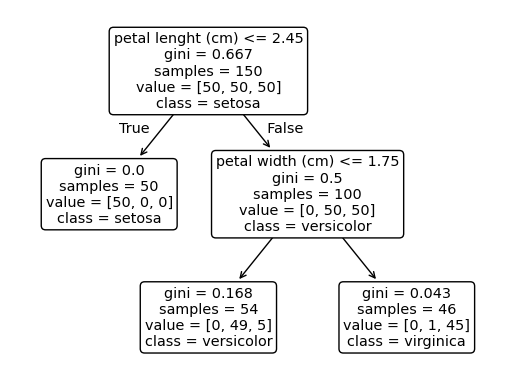

In [4]:
# visualizing tree graph
plot_tree(tree_clf,feature_names=['petal lenght (cm)', 'petal width (cm)'], class_names=iris.target_names, rounded=True)

In [11]:
X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf_1 = DecisionTreeClassifier(random_state=42)
tree_clf_2 = DecisionTreeClassifier(max_leaf_nodes=5, random_state=42)
tree_clf_1.fit(X_moons, y_moons)
tree_clf_2.fit(X_moons, y_moons)

DecisionTreeClassifier(max_leaf_nodes=5, random_state=42)

In [12]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.2, random_state=42)
print(tree_clf_1.score(X_moons, y_moons))
print(tree_clf_2.score(X_moons, y_moons))

0.901
0.908


[Text(0.5, 0.8333333333333334, 'x[0] <= -0.303\nsquared_error = 0.006\nsamples = 200\nvalue = 0.088'),
 Text(0.25, 0.5, 'x[0] <= -0.408\nsquared_error = 0.002\nsamples = 44\nvalue = 0.172'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.001\nsamples = 20\nvalue = 0.213'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.001\nsamples = 24\nvalue = 0.138'),
 Text(0.75, 0.5, 'x[0] <= 0.272\nsquared_error = 0.005\nsamples = 156\nvalue = 0.065'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.001\nsamples = 110\nvalue = 0.028'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.002\nsamples = 46\nvalue = 0.154')]

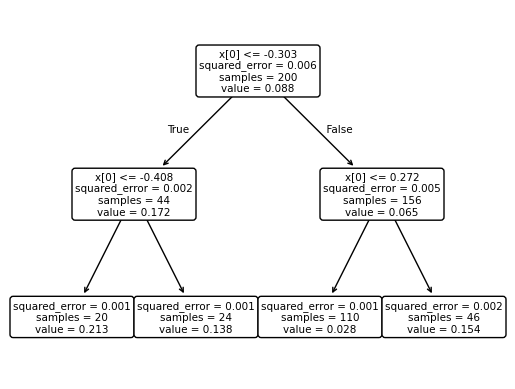

In [ ]:
# Regression

np.random.seed(42)
X_quad = np.random.rand(200,1) - 0.5
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)
tree_reg = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg.fit(X_quad, y_quad)

plot_tree(tree_reg, rounded=True)

In [26]:
pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_pca = DecisionTreeClassifier(random_state=42, max_depth=2)
tree_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)